### **Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

### Author: ABHISHEK KUMAR SAXENA

In [1]:
# Importing libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns

In [2]:
# Reading data from remote link
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)
print("Data imported successfully")

Data imported successfully


In [3]:
s_data.shape #total number of rows and columns

(25, 2)

In [4]:
s_data.columns

Index(['Hours', 'Scores'], dtype='object')

In [5]:
s_data.dtypes

Hours     float64
Scores      int64
dtype: object

In [6]:
s_data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [7]:
s_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
s_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

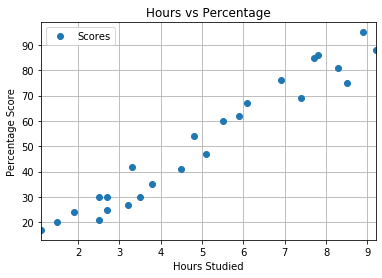

In [9]:
# Plotting the distribution of scores
s_data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')
plt.grid()
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

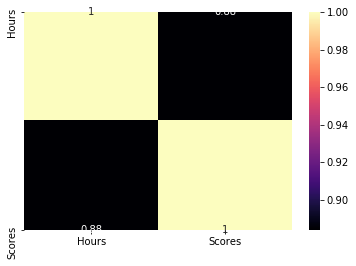

In [10]:
relation = s_data.corr(method ='kendall')
sns.heatmap(relation, annot=True, cmap='magma')
plt.show()

### **Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [11]:
X = s_data.drop(['Scores'],axis=1)
y = s_data['Scores'] 

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [12]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [13]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


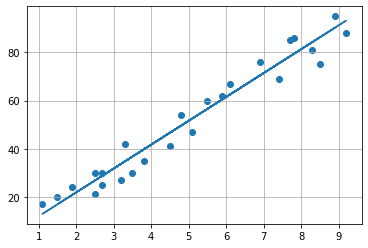

In [14]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.grid()
plt.show()

### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [15]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

    Hours
5     1.5
2     3.2
19    7.4
16    2.5
11    5.9


In [16]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


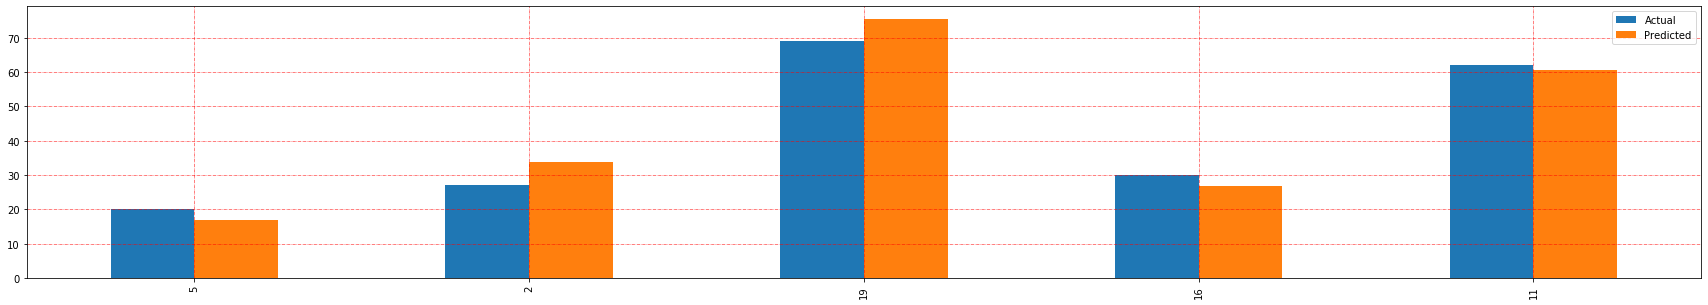

In [17]:
graph = df.head()
graph.plot(kind='bar',figsize=(30,5))
plt.grid(which = 'both', color='red', linestyle='-.', linewidth=0.5)
plt.show()

In [18]:
print(f'The train score: {regressor.score(X_train,y_train)}')
print(f'The test score: {regressor.score(X_test,y_test)}')

The train score: 0.9515510725211553
The test score: 0.9454906892105356


In [19]:
# You can also test with your own data
hours = float(input(' Enter the hours of study:- '))
predicted = regressor.predict([[hours]])
print(" If a student studies for = {}".format(hours),"hours, then his/her predicted score is = {}%".format(predicted))

 Enter the hours of study:- 9.25
 If a student studies for = 9.25 hours, then his/her predicted score is = [93.69173249]%


### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset.

In [20]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665
